In [ ]:
# Statistics - Measures
# Measures of Central Tendency - Mean, Median, Mode
# Measures of Dispersion/Spread - Range, Variance, Standard deviation
# Measures of Position - Percentile, Quartile, Z-Score
# Measures of Association - Correlation, Regression
# Measures of Frequency - Count, Frequency Distribution, Relative Frequency, Cumulative Frequency
# Others - Probability, Bayer's Theorem, Bias, Outlier, Outlier Detection, Confidence Interval, Population, Sample, Variable

In [8]:
#Mean - Arithmetic, Geometric, Harmonic, Weighted
# Arithmetic Mean Calculation - The Arithmetic Mean (AM) is the most commonly used type of mean. 
# It is simply the sum of all data points divided by the number of data points.
# B UC: calculate the average balance across accounts. For example, if a bank wants to know the average balance of its customers over a month, 
# the arithmetic mean can be used. Ex: A bank has the following balances for 5 accounts at the end of the month: $500, $600, $700, $800, $900.

balances = [500, 600, 700, 800, 900]
arithmetic_mean = sum(balances) / len(balances)
print(f"Arithmetic Mean of the balances: ${arithmetic_mean}")

# Geometric Mean Calculation - measure of central tendency that is appropriate for datasets with multiplicative relationships, 
# such as growth rates or percentage changes. The geometric mean is calculated by multiplying all the values together and then taking the nth root,
# where n is the number of values.
# B UC: calculate the average growth rate of an investment over time. For example, if a bank tracks the monthly return on an investment, 
# the geometric mean can help calculate the average rate of return over multiple months. 
# Ex: The monthly returns on an investment are 5%, 3%, and 2% for three months.

import numpy as np
returns = [1.05, 1.03, 1.02]  # Representing 5%, 3%, and 2% returns as growth factors
geometric_mean = np.prod(returns) ** (1 / len(returns))

# Convert to percentage form
geometric_mean_percentage = (geometric_mean - 1) * 100
print(f"Geometric Mean of the returns: {geometric_mean_percentage:.2f}%")

# Harmonic Mean Calculation - is used for datasets where rates or ratios are involved. The harmonic mean is calculated by taking the reciprocal 
# of each value, averaging them, and then taking the reciprocal of the result.
# B UC: calculating average interest rates over different periods or across multiple loans with different terms. 
# Ex: A bank offers two loans, one with an interest rate of 5% for 2 years and another with 10% for 3 years. 
# The harmonic mean can be used to calculate the average interest rate over these two loans.

interest_rates = [5, 10]  # Representing interest rates for two loans
harmonic_mean = len(interest_rates) / sum(1 / rate for rate in interest_rates)
print(f"Harmonic Mean of the interest rates: {harmonic_mean:.2f}%")

# Weighted Mean Calculation - takes into account the different importance or weight of each value in the dataset. 
# It is calculated by multiplying each value by a corresponding weight, summing those products, and dividing by the sum of the weights.
# B UC: calculate the average rate of return on an investment portfolio, where each asset has a different weight in the portfolio. 
# For ex, if 60% of the portfolio is invested in a bond with a 4% return, and 40% is invested in stocks with a 10% return, 
# the weighted mean can give the overall return. Ex: A portfolio consists of: 60% in a bond with a 4% return 40% in stocks with a 10% return

returns = [4, 10]  # Representing return rates for bonds and stocks
weights = [0.6, 0.4]  # Representing the portfolio weights
weighted_mean = sum(w * r for w, r in zip(weights, returns)) / sum(weights)
print(f"Weighted Mean of the returns: {weighted_mean:.2f}%")

Arithmetic Mean of the balances: $700.0
Geometric Mean of the returns: 3.33%
Harmonic Mean of the interest rates: 6.67%
Weighted Mean of the returns: 6.40%


In [9]:
# Median - represents the middle value in a dataset when the data is arranged in ascending or descending order. Simple, Weighted, Grouped 
# Simple Median - where the dataset is sorted, and the middle value is selected. If the number of data points is odd, the median is the middle value.
# If the number of data points is even, the median is the average of the two middle values.
# B UC: analyze customer balances in a dataset where there may be a few customers with extremely high or low balances, which could skew the mean. 
# The median will give a better idea of a typical customer’s balance. Ex: Customer balances at a bank are: $100, $500, $1500, $2000, and $3000.

import numpy as np

# Customer balances
balances = [100, 500, 1500, 2000, 3000]

# Calculate the Simple Median
simple_median = np.median(balances)

print(f"Simple Median of the balances: ${simple_median}")

# Weighted Median - where each data point has a weight assigned to it. It is useful when the data points have different levels of importance or 
# frequency, and we want to calculate the median considering the weights. Arrange the data points in ascending order. Sum the weights cumulatively.
# The median is the data point where the cumulative weight reaches or exceeds half of the total weight.
# B UC: Banks often deal with loan portfolios where different loans may have different principal amounts. 
# The weighted median can be used to determine the "typical" loan size, accounting for the size (weight) of each loan.
# Ex: A bank has the following loan amounts and their corresponding frequencies (weights): $1000 loan, 3 occurrences $5000 loan, 2 occurrences
# $10000 loan, 1 occurrence

# Loan amounts and their frequencies (weights)
loan_amounts = [1000, 5000, 10000]
frequencies = [3, 2, 1]

# Calculate the Weighted Median
weighted_median = np.median(np.repeat(loan_amounts, frequencies))

print(f"Weighted Median of the loan amounts: ${weighted_median}")

# Grouped Median - is used when the data is grouped into intervals or ranges, and we need to calculate the median for this grouped data. 
# The grouped data is represented in terms of frequency distributions. Find the cumulative frequency for each class interval.
# Determine the class interval where the cumulative frequency exceeds half of the total frequency. 
# Use interpolation to find the median within the selected class interval.
# B UC: Banks can use the grouped median to analyze customer income ranges (e.g., income brackets) or transaction volumes grouped in intervals. 
# This helps in segmenting customers based on income or transaction amounts. Ex: A bank wants to determine the median income for a set of customers. 
# The income ranges and their frequencies are: $0–$20k: 10 customers $20k–$40k: 15 customers $40k–$60k: 5 customers
# Grouped data: income ranges and frequencies
income_ranges = [(0, 20000), (20000, 40000), (40000, 60000)]
frequencies = [10, 15, 5]

# Total number of customers
total_customers = sum(frequencies)

# Cumulative frequency
cumulative_frequency = np.cumsum(frequencies)

# Find the median class (where cumulative frequency > half of total customers)
median_class = None
for i, cf in enumerate(cumulative_frequency):
    if cf >= total_customers / 2:
        median_class = income_ranges[i]
        break

# Interpolation for grouped median
lower_bound = median_class[0]
class_width = median_class[1] - median_class[0]
median_class_frequency = frequencies[i]
previous_cumulative_frequency = cumulative_frequency[i - 1] if i > 0 else 0

# Median formula: L + [(N/2 - F) / f] * w
median_income = lower_bound + ((total_customers / 2 - previous_cumulative_frequency) / median_class_frequency) * class_width

print(f"Grouped Median Income: ${median_income:.2f}")

Simple Median of the balances: $1500.0
Weighted Median of the loan amounts: $3000.0
Grouped Median Income: $26666.67


In [10]:
# Mode - refers to the value that appears most frequently in a dataset. - Unimodal, Bimodal, Multimodal, No Mode
# Unimodal - is a dataset that has only one value that appears most frequently. This is the simplest case where there is a single mode.
# B UC: A bank can use the unimodal mode to identify the most common loan amount requested by customers. 
# This can help the bank understand the demand for certain loan sizes. Ex: A bank has recorded the loan amounts requested by customers:
# $5000, $7000, $7000, $12000, $5000, $5000.

from collections import Counter

# Loan amounts requested by customers
loan_requests = [5000, 7000, 7000, 12000, 5000, 5000]

# Calculate the mode
loan_counter = Counter(loan_requests)
mode_loan = loan_counter.most_common(1)[0][0]

print(f"Unimodal Mode of the loan requests: ${mode_loan}")

# Bimodal - occurs when there are two values in the dataset that appear with the same highest frequency.
# B UC: In a scenario where customers are making different types of transactions, 
# the bank might want to know the two most frequent transaction amounts to optimize customer service or ATM cash replenishment. 
# Ex: A bank records the amounts of daily transactions: # $100, $150, $200, $100, $250, $150, $300.

from collections import Counter

# Transaction amounts
transactions = [100, 150, 200, 100, 250, 150, 300]

# Calculate the mode
transaction_counter = Counter(transactions)
modes = transaction_counter.most_common()

# Find the two most frequent values
bimodal_modes = [mode[0] for mode in modes if mode[1] == modes[0][1]]

print(f"Bimodal Modes of the transaction amounts: {bimodal_modes}")

# Multimodal - A multimodal mode refers to a dataset where there are more than two values with the highest frequency.
# B UC: In a bank's loan application data, a multimodal distribution can help identify multiple loan amounts that are equally popular among customers. 
# This can aid the bank in deciding how to market different loan products.
# Ex: A bank tracks the number of loans requested in three categories: $5000, $5000, $7000, $7000, $12000, $12000, $15000.

from collections import Counter

# Loan amounts requested by customers
loan_requests = [5000, 5000, 7000, 7000, 12000, 12000, 15000]

# Calculate the mode
loan_counter = Counter(loan_requests)
modes = loan_counter.most_common()

# Find the most frequent values
multimodal_modes = [mode[0] for mode in modes if mode[1] == modes[0][1]]

print(f"Multimodal Modes of the loan requests: {multimodal_modes}")

# No Mode - A no mode situation arises when all values in the dataset occur with the same frequency, 
# meaning no particular value is repeated more frequently than others.
# B UC: A bank may find that customer transaction amounts vary widely and evenly, with no one amount standing out more frequently than others. 
# In such a case, there is no mode to report. Ex: A bank records the transaction amounts for a day: $100, $200, $300, $400, $500.

from collections import Counter

# Transaction amounts
transactions = [100, 200, 300, 400, 500]

# Calculate the mode
transaction_counter = Counter(transactions)
modes = transaction_counter.most_common()

# Check if there's a mode
if len(modes) == len(transactions):
    no_mode = True
else:
    no_mode = False

print(f"Is there a mode? {'No' if no_mode else 'Yes'}")


Unimodal Mode of the loan requests: $5000
Bimodal Modes of the transaction amounts: [100, 150]
Multimodal Modes of the loan requests: [5000, 7000, 12000]
Is there a mode? No


In [11]:
# Range - describes the spread or dispersion of a dataset. It is the diff. between the maximum and minimum values in the dataset. It gives a sense of 
# how much variation or variability exists in the data, but it does not provide any information about the distribution of values between the extremes.
# Types - Simple, Quartile, Interquartile.
# Simple - is the most straightforward way to calculate the range of a dataset. It involves subtracting the smallest value (minimum) from the 
# largest value (maximum). Find the minimum and maximum value in the dataset. Subtract the minimum value from the maximum value to calculate the range.
# B UC: Banks can use the simple range to understand the spread of customer account balances or loan amounts. 
# This gives an idea of the disparity between the richest and poorest customers or the highest and lowest loan amounts.
# Ex: A bank wants to know the range of customer account balances: $5000, $2000, $15000, $3000, $10000.

# Customer account balances
balances = [5000, 2000, 15000, 3000, 10000]

# Calculate the Simple Range
simple_range = max(balances) - min(balances)

print(f"Simple Range of customer balances: ${simple_range}")

# Adjusted - is a variation of the simple range, often used in certain statistical contexts where you adjust the range to account for extreme outliers. It is calculated by adjusting the maximum and minimum values based on a certain factor (e.g., ignoring extreme outliers).
# Identify any extreme outliers in the data (values far from the mean). Remove the outliers or adjust the maximum and minimum values.
# Calculate the range with the adjusted value# s.
# B UC: Banks often deal with financial data that may include outliers, such as one or two very large transactions.
# An adjusted range can help give a better sense of the typical range of account balances or loan amounts by excluding such outliers.
# Ex: Consider a scenario where a few customers have extremely high loan amounts: $5000, $2000, $15000, $3000, $1000000.

# Loan amounts
loan_amounts = [5000, 2000, 15000, 3000, 1000000]

# Remove the outlier (1000000) and calculate the adjusted range
loan_amounts.remove(max(loan_amounts))  # Removing outlier

# Calculate the Adjusted Range
adjusted_range = max(loan_amounts) - min(loan_amounts)

print(f"Adjusted Range of loan amounts: ${adjusted_range}")

# Interquartile Range(IQR): is a measure of statistical dispersion and represents the range between the 1st quartile (Q1) and the 3rd quartile (Q3) of
# a dataset. It is the diff. between the 75th percentile (Q3) and the 25th percentile (Q1) values, and it is used to understand the spread of the  
# middle 50% of the data. IQR is less sensitive to outliers compared to the simple range because it excludes the extreme 25% of the data on both ends.
# Sort the data in ascending order. Find the first quartile (Q1) — the median of the lower half of the data. 
# Find the third quartile (Q3) — the median of the upper half of the data. Subtract Q1 from Q3 to get the IQR.
# B UC: Banks can use IQR to understand the spread of customer account balances or loan amounts, focusing on the middle 50% of the data. 
# This helps reduce the influence of extremely rich or poor customers (outliers) on the analysis.
# Ex: A bank wants to understand the spread of account balances, excluding the outliers: $5000, $2000, $15000, $3000, $10000.

# Customer account balances
balances = [5000, 2000, 15000, 3000, 10000]

# Calculate the Interquartile Range (IQR)
Q1 = np.percentile(balances, 25)
Q3 = np.percentile(balances, 75)
IQR = Q3 - Q1

print(f"Interquartile Range (IQR) of customer balances: ${IQR}")


Simple Range of customer balances: $13000
Adjusted Range of loan amounts: $13000
Interquartile Range (IQR) of customer balances: $7000.0


In [12]:
# Variance - quantifies the spread or dispersion of a dataset. It measures how far each data point in the set is from the mean (average) of the dataset. Variance is calculated as the average of the squared differences from the mean. A higher variance means that the data points are more spread out, while a lower variance indicates that the data points are closer to the mean.
# It is the square of the standard deviation, and it is often used alongside standard deviation to understand the data distribution.
# Types of Variance - Population Variance, Sample Variance, Weighted Variance, Population Variance
# Population - used when the dataset represents the entire population. This means the#  data includes every possible data point, 
# and there is no need to estimate any values. The population variance is calculated by averaging the squared differences between each data point
# and the population mean. Calculate the mean of the entire dataset. Subtract the mean from each data point and square the result. 
# Sum all the squared differences. Divide the sum by n (the number of data points in the dataset). 
# B UC: A bank can use the population variance to analyze the variability of account balances for all customers in its database. 
# Ex: understanding how widely customer balances deviate from the average balance can help the bank in risk management, marketing strategies, or 
#designing banking products. Ex: The bank wants to calculate the population variance of customer account balances: $5000, $2000, $15000, $3000, $10000.

import numpy as np

# Customer account balances
balances = [5000, 2000, 15000, 3000, 10000]

# Calculate Population Variance
population_variance = np.var(balances)

print(f"Population Variance of customer balances: ${population_variance:.2f}")

# Sample - The sample variance is used when the dataset is a sample drawn from a larger population. It accounts for the fact that the 
# data represents only a subset of the population, and the formula includes a correction factor (n−1) to adjust for the bias introduced by sampling.
# Calculate the mean of the sample data. Subtract the mean from each data point and square the result. Sum all the squared differences.
# Divide the sum by n−1 (degrees of freedom) to get an unbiased estimate of the population variance.
# B UC: If a bank is analyzing a sample of customer balances rather than the entire population, it would use the sample variance. 
# For ex, if the bank randomly selects a sample of 50 customers, the variance of the sample can be used to estimate the variance for the entire 
# customer base. Ex: The bank wants to calculate the sample variance of loan amounts for a small group of loans: $5000, $2000, $15000, $3000, $10000.

# Loan amounts
loan_amounts = [5000, 2000, 15000, 3000, 10000]

# Calculate Sample Variance
sample_variance = np.var(loan_amounts, ddof=1)

print(f"Sample Variance of loan amounts: ${sample_variance:.2f}")

# Weighted - The weighted variance is used when the data points in the dataset have different weights or frequencies. 
# This type of variance takes into account the relative importance of each data point by assigning a weight to each point. 
# Higher weights mean that the corresponding data points have more influence on the variance.
# Multiply each data point by its weight. Calculate the weighted mean (average), considering the weights. 
# Subtract the weighted mean from each data point, square the result, and multiply by the weight. Sum all the weighted squared differences.
# Divide by the sum of the weights to get the weighted variance.
# B UC: Analyze the variability of loan amounts where loans with larger values (higher weights) are more important than loans with smaller values. 
# For ex, the bank may want to calculate the variance of loan amounts while giving more importance to higher-value loans 
# due to their greater risk or impact on the bank’s financial health. # Ex: A bank has loan amounts and corresponding weights 
# (e.g., number of customers applying for each loan amount): Loan amounts: $5000, $2000, $15000, $3000, $10000 Weights: 10, 5, 2, 8, 4

# Loan amounts and corresponding weights
loan_amounts = [5000, 2000, 15000, 3000, 10000]
weights = [10, 5, 2, 8, 4]

# Calculate Weighted Variance
weighted_variance = np.average((np.array(loan_amounts) - np.average(loan_amounts, weights=weights))**2, weights=weights)

print(f"Weighted Variance of loan amounts: ${weighted_variance:.2f}")


Population Variance of customer balances: $23600000.00
Sample Variance of loan amounts: $29500000.00
Weighted Variance of loan amounts: $12903686.09


In [13]:
# Standard deviation: describes the amount of variation or dispersion in a dataset. It quantifies how much individual data points deviate 
# from the mean (average) of the dataset. In other words, the standard deviation gives an idea of how spread out the values in a dataset are. 
# A low standard deviation indicates that the data points tend to be close to the mean, while a high standard deviation indicates that the 
# data points are spread out over a wider range. Types - Population, Sample, Weighted
# Population standard deviation - is used when the data represents the entire population, meaning all possible data points are included 
# in the analysis. Find the mean (average) of the dataset. Subtract the mean from each data point and square the result. Sum all the squared results.
# Divide by the total number of data points (n) to get the variance. Take the square root of the variance to get the population standard deviation.
# B UC: A bank may use population standard deviation to assess the variability of account balances across all customers. 
# If the bank has data for every customer, it would calculate the population standard deviation to understand how spread out the balances are.
# Example Scenario: A bank wants to calculate the population standard deviation of customer account balances: $5000, $2000, $15000, $3000, $10000.

import numpy as np

# Customer account balances
balances = [5000, 2000, 15000, 3000, 10000]

# Calculate Population Standard Deviation
population_sd = np.std(balances)

print(f"Population Standard Deviation of customer balances: ${population_sd:.2f}")

# Sample Standard Deviation - The sample standard deviation is used when the data represents only a sample of a larger population. 
# In this case, the sample standard deviation accounts for the fact that the dataset may not capture all possible data points, 
# so the variance is divided by n−1 (degrees of freedom) instead of n. Find the sample mean. Subtract the mean from each data point 
# and square the result. Sum all the squared results. Divide by  n−1 (where n is the sample size). Take the square root to obtain the 
# sample standard deviation. Use Case in Banking: If a bank wants to calculate the standard deviation of loan amounts based on a sample of loans 
# (rather than all loans), it would use the sample standard deviation. This helps the bank estimate the variability of loan sizes in the 
# population of all loans. Example Scenario: A bank wants to calculate the sample standard deviation of loan amounts for a small group of loans:
# $5000, $2000, $15000, $3000, $10000.

# Loan amounts
loan_amounts = [5000, 2000, 15000, 3000, 10000]

# Calculate Sample Standard Deviation
sample_sd = np.std(loan_amounts, ddof=1)

print(f"Sample Standard Deviation of loan amounts: ${sample_sd:.2f}")

# Weighted Standard Deviation - The weighted standard deviation is used when different data points have different levels of importance or frequency.
# This type of standard deviation takes into account the weights associated with each data point. Multiply each data point by its corresponding weight.
# Calculate the weighted mean (average). Subtract the weighted mean from each data point, square the result, and multiply by the weight.
# Sum all the weighted squared differences. Divide by the sum of the weights. Take the square root to get the weighted standard deviation.
# B UC: Banks may want to calculate the weighted standard deviation of loan amounts where larger loans are more significant or have higher weights. 
# For instance, if a bank is calculating the risk associated with different types of loans, loans of higher value may be given more weight.
# Example Scenario: A bank has loan amounts and their corresponding weights (for example, the number of customers applying for each loan amount):
# Loan amounts: $5000, $2000, $15000, $3000, $10000 Weights (number of customers): 10, 5, 2, 8, 4 

# Loan amounts and corresponding weights (number of customers)
loan_amounts = [5000, 2000, 15000, 3000, 10000]
weights = [10, 5, 2, 8, 4]

# Calculate Weighted Standard Deviation
weighted_sd = np.sqrt(np.average((np.array(loan_amounts) - np.average(loan_amounts, weights=weights))**2, weights=weights))

print(f"Weighted Standard Deviation of loan amounts: ${weighted_sd:.2f}")



Population Standard Deviation of customer balances: $4857.98
Sample Standard Deviation of loan amounts: $5431.39
Weighted Standard Deviation of loan amounts: $3592.17


In [14]:
# Percentile - indicates the relative position of a data point within a dataset. It divides the data into 100 equal parts, such that the 𝑝
# p-th percentile is the value below which p% of the data falls. In other words, if a data point is at the 50th percentile, 
# then 50% of the data lies below that point. Percentiles are useful for understanding the distribution of data and for comparing individual 
# data points against the overall dataset. Types - Quartiles (Special Percentiles), First Quartile (Q1), Second Quartile (Q2 or Median), 
# Third Quartile (Q3), Deciles, Percentiles (General Percentiles)

# Quartiles (Special Percentiles) - specific percentiles that divide the data into four equal parts. These are the most commonly used percentiles 
# in statistics and provide useful insights into the distribution of data. Types of Quartiles: - First Quartile (Q1): The 25th percentile, 
# representing the value below which 25% of the data falls., Second Quartile (Q2 or Median): The 50th percentile, 
# which is the middle value of the dataset., Third Quartile (Q3): The 75th percentile, representing the value below which 75% of the data falls.
# B UC: In banking, quartiles are often used to understand the distribution of customer balances, loan amounts, or transaction values. 
# For instance, a bank may use quartiles to categorize customers into low, medium, and high account balances.
# Example Scenario: A bank wants to calculate the quartiles of account balances for a sample of customers: $5000, $2000, $15000, $3000, $10000.

import numpy as np

# Customer account balances
balances = [5000, 2000, 15000, 3000, 10000]

# Calculate Quartiles (25th, 50th, 75th percentiles)
Q1 = np.percentile(balances, 25)
Q2 = np.percentile(balances, 50)  # Median
Q3 = np.percentile(balances, 75)

print(f"First Quartile (Q1): ${Q1:.2f}")
print(f"Second Quartile (Q2 - Median): ${Q2:.2f}")
print(f"Third Quartile (Q3): ${Q3:.2f}")

# Deciles - Deciles divide the data into 10 equal parts. Each decile represents 10% of the data. Specifically: 
# First Decile (D1): 10th percentile, below which 10% of the data falls. Second Decile (D2): 20th percentile, below which 20% of the data falls & so on
# B UC: Deciles can be used in banking to segment customers based on their credit scores, loan amounts, or account balances. 
# For example, a bank might use deciles to target the top 10% of customers with the highest account balances for premium services.
# Example Scenario: A bank wants to calculate the deciles of loan amounts: $5000, $2000, $15000, $3000, $10000. 

# Loan amounts
loan_amounts = [5000, 2000, 15000, 3000, 10000]

# Calculate Deciles (10th, 20th, 30th...90th percentiles)
deciles = np.percentile(loan_amounts, np.arange(10, 100, 10))

for i, decile in enumerate(deciles, 1):
    print(f"{i*10}th Decile: ${decile:.2f}")

# Percentiles (General Percentiles) - General Percentiles refer to any percent value between 0 and 100. 
# These percentiles are used when you want to divide the data into a specific percentage of the dataset.
# B UC: Banks can use general percentiles to assess customer transaction behavior or balance distributions. 
# For instance, a bank may use the 95th percentile to identify the top 5% of customers with the highest spending patterns or balances.
# Example Scenario: A bank wants to calculate the 25th, 50th, and 95th percentiles of customer transaction amounts: $100, $200, $50, $500, $700.

# Transaction amounts
transactions = [100, 200, 50, 500, 700]

# Calculate 25th, 50th, and 95th percentiles
P25 = np.percentile(transactions, 25)
P50 = np.percentile(transactions, 50)
P95 = np.percentile(transactions, 95)

print(f"25th Percentile: ${P25:.2f}")
print(f"50th Percentile (Median): ${P50:.2f}")
print(f"95th Percentile: ${P95:.2f}")

First Quartile (Q1): $3000.00
Second Quartile (Q2 - Median): $5000.00
Third Quartile (Q3): $10000.00
10th Decile: $2400.00
20th Decile: $2800.00
30th Decile: $3400.00
40th Decile: $4200.00
50th Decile: $5000.00
60th Decile: $7000.00
70th Decile: $9000.00
80th Decile: $11000.00
90th Decile: $13000.00
25th Percentile: $100.00
50th Percentile (Median): $200.00
95th Percentile: $660.00


In [15]:
# Z-score (also known as the standard score or z-value) is a statistical measure that describes how many standard deviations 
# a particular data point is away from the mean of the dataset. It allows us to understand how extreme or typical a value is within a dataset.
# Types of Z-Scores - Raw Z-Score: The Z-score computed directly from the dataset. Sample Z-Score: The Z-score for a sample from a larger population.
# Population Z-Score: The Z-score computed for an entire population.
# Raw Z-Score (Standard Z-Score) - The Raw Z-Score refers to the Z-score calculated for an individual data point relative to the mean 
# and standard deviation of the dataset. It shows how many standard deviations a particular value is away from the mean.
# B UC: A bank might use the Z-score to assess the relative risk of individual loan amounts compared to the average loan size. 
# A Z-score greater than 3 might indicate an unusually large loan application, potentially signifying higher risk or an outlier.
# Example Scenario: A bank wants to determine how a loan amount of $25,000 compares to the mean loan amount of $15,000 
# with a standard deviation of $5,000. The bank uses the Z-score to assess whether the loan size is unusually large.

# Loan amount, mean, and standard deviation
loan_amount = 25000
mean_loan = 15000
std_dev_loan = 5000

# Calculate the Z-score
z_score = (loan_amount - mean_loan) / std_dev_loan

print(f"Raw Z-Score of loan amount: {z_score:.2f}")

# Sample Z-Score - The Sample Z-Score is used when the data represents a sample taken from a larger population, not the entire population. 
# It adjusts for the fact that the dataset is only a sample, which means the Z-score is computed using the sample mean and sample standard deviation.
# B UC: Banks often work with samples rather than the entire customer base. For instance, if the bank wants to assess a new loan product's risk 
# by analyzing a sample of loans, the sample Z-score will help to understand how extreme a particular loan is in comparison to the sample dataset.
# Example Scenario: A bank wants to assess a loan of $25,000. The sample of loans has a mean of $20,000 and a standard deviation of $4,000.

# Loan amount, sample mean, and sample standard deviation
loan_amount = 25000
sample_mean = 20000
sample_std_dev = 4000

# Calculate the Sample Z-score
sample_z_score = (loan_amount - sample_mean) / sample_std_dev

print(f"Sample Z-Score of loan amount: {sample_z_score:.2f}")

# Population Z-Score - The Population Z-Score is used when the dataset represents the entire population (not a sample). 
# It is computed similarly to the raw Z-score but uses the population mean and population standard deviation.
# B UC: Banks may use the population Z-score to evaluate customer behavior, such as comparing individual transaction amounts 
# or loan balances against the entire customer base. This approach is applicable when the bank has access to data for all its customers.
# Example Scenario: The bank wants to assess a transaction of $500 compared to the entire customer transaction history, 
# where the population mean is $350 and the population standard deviation is $75.

# Transaction amount, population mean, and population standard deviation
transaction_amount = 500
population_mean = 350
population_std_dev = 75

# Calculate the Population Z-score
population_z_score = (transaction_amount - population_mean) / population_std_dev

print(f"Population Z-Score of transaction amount: {population_z_score:.2f}")


Raw Z-Score of loan amount: 2.00
Sample Z-Score of loan amount: 1.25
Population Z-Score of transaction amount: 2.00


Positive Correlation Coefficient: 1.00


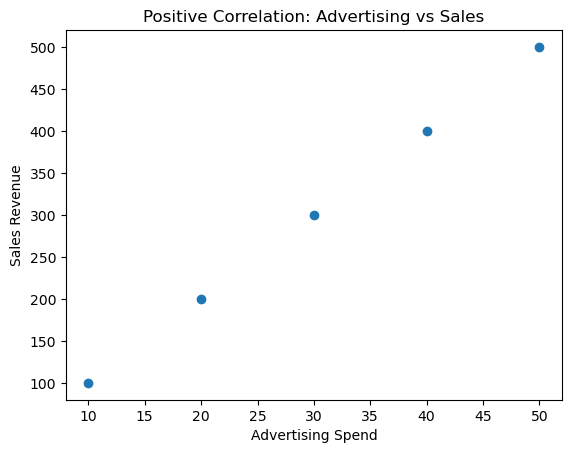

Negative Correlation Coefficient: -1.00


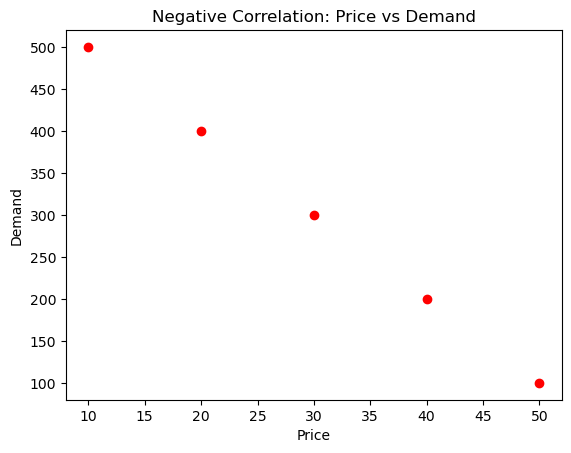

No Correlation Coefficient: 0.08


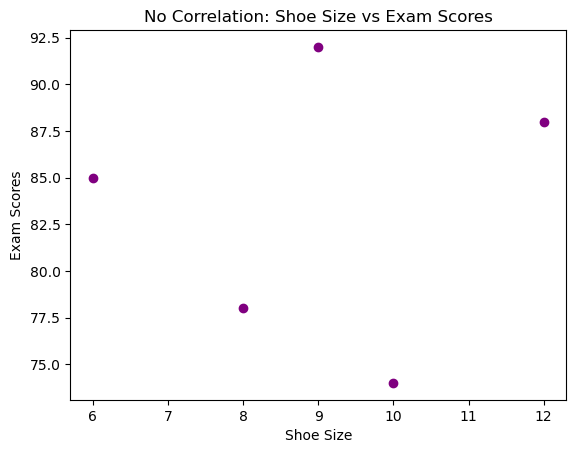

Linear Correlation Coefficient: 1.00


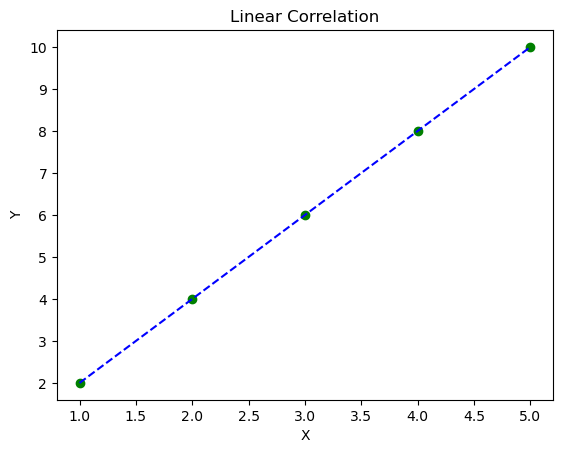

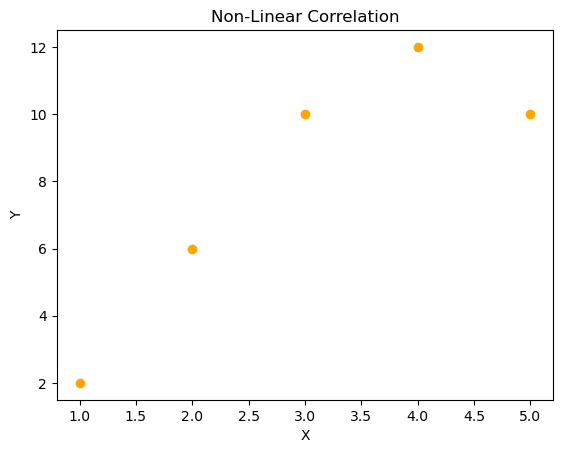

In [20]:
# Correlation is a statistical measure that describes the relationship between two variables. It shows whether, and how strongly, 
# pairs of variables are related. Correlation is expressed as a number (correlation coefficient) that ranges from -1 to 1.
# Types of Correlation - Positive Correlation, Negative Correlation, No Correlation, Linear Correlation, Non-Linear (Curvilinear) Correlation
# Positive Correlation - When two variables increase or decrease together, they are said to have a positive correlation.
# Example: As advertising spending increases, sales revenue increases.
# B UC: Predicting sales growth based on marketing expenditure. , Estimating revenue changes with customer acquisition efforts.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Sample data
advertising_spend = np.array([10, 20, 30, 40, 50])
sales_revenue = np.array([100, 200, 300, 400, 500])

# Calculate correlation coefficient
correlation, _ = pearsonr(advertising_spend, sales_revenue)
print(f"Positive Correlation Coefficient: {correlation:.2f}")

# Visualization
plt.scatter(advertising_spend, sales_revenue)
plt.title("Positive Correlation: Advertising vs Sales")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales Revenue")
plt.show() 

# Negative Correlation - When one variable increases and the other decreases, they have a negative correlation.
# Example: As the price of a product increases, its demand decreases.
# B UC: Analyzing the impact of price increases on sales volume. , Studying employee attrition rate as job satisfaction decreases.

# Sample data
price = np.array([10, 20, 30, 40, 50])
demand = np.array([500, 400, 300, 200, 100])

# Calculate correlation coefficient
correlation, _ = pearsonr(price, demand)
print(f"Negative Correlation Coefficient: {correlation:.2f}")

# Visualization
plt.scatter(price, demand, color='red')
plt.title("Negative Correlation: Price vs Demand")
plt.xlabel("Price")
plt.ylabel("Demand")
plt.show()

# No Correlation - When there is no relationship between two variables, they are said to have no correlation. •	Example: Shoe size and exam scores.
# B UC: Understanding if two variables are independent (e.g., studying if marketing spend affects competitor sales).

# Sample data
shoe_size = np.array([6, 8, 9, 10, 12])
exam_scores = np.array([85, 78, 92, 74, 88])

# Calculate correlation coefficient
correlation, _ = pearsonr(shoe_size, exam_scores)
print(f"No Correlation Coefficient: {correlation:.2f}")

# Visualization
plt.scatter(shoe_size, exam_scores, color='purple')
plt.title("No Correlation: Shoe Size vs Exam Scores")
plt.xlabel("Shoe Size")
plt.ylabel("Exam Scores")
plt.show()

# Linear Correlation - When the relationship between two variables can be represented by a straight line, it is a linear correlation.
# Positive or negative correlation can both be linear. 
# B UC: Estimating ROI from marketing campaigns based on investment.

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # Perfect linear relationship (positive)

# Calculate correlation coefficient
correlation, _ = pearsonr(x, y)
print(f"Linear Correlation Coefficient: {correlation:.2f}")

# Visualization
plt.scatter(x, y, color='green')
plt.plot(x, y, color='blue', linestyle='--')  # Linear fit
plt.title("Linear Correlation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Non-Linear (Curvilinear) Correlation - When the relationship between two variables follows a curve, it is called non-linear 
# or curvilinear correlation. Example: Stress level vs productivity: Productivity may increase with stress up to a certain point, then decrease.
# B UC: Studying diminishing returns: Productivity vs hours worked. , Analyzing customer satisfaction vs price discounts.

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 6, 10, 12, 10])  # Non-linear relationship

# Visualization
plt.scatter(x, y, color='orange')
plt.title("Non-Linear Correlation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
Pearson's correlation coefficient (often denoted as r) is a statistical measure that evaluates the linear relationship between two continuous variables. It provides insights into the strength and direction of the association between the variables, ranging from -1 to 1:
Step-by-Step Calculation Example
Let's say we have two lists of values:
•	XXX: [10, 20, 30, 40, 50]
•	YYY: [15, 30, 45, 60, 75]
1.	Calculate the Means of XXX and YYY:
o	Mean of XXX: Xˉ=10+20+30+40+505=30\bar{X} = \frac{10 + 20 + 30 + 40 + 50}{5} = 30Xˉ=510+20+30+40+50=30
o	Mean of YYY: Yˉ=15+30+45+60+755=45\bar{Y} = \frac{15 + 30 + 45 + 60 + 75}{5} = 45Yˉ=515+30+45+60+75=45
2.	Calculate the Covariance between XXX and YYY:
Cov(X,Y)=∑(Xi−Xˉ)(Yi−Yˉ)n\text{Cov}(X, Y) = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{n}Cov(X,Y)=n∑(Xi−Xˉ)(Yi−Yˉ)
3.	Calculate the Standard Deviations of XXX and YYY.
4.	Compute r using the formula above.
________________________________________
Business Use Cases for Pearson's Correlation
1. Marketing Spend vs Sales Revenue
•	Companies often analyze how their advertising or marketing budget correlates with revenue. A strong positive correlation suggests effective marketing.
2. Customer Satisfaction vs Retention Rate
•	A business may analyze the relationship between customer satisfaction scores and retention rates to understand if improving customer experience leads to higher customer loyalty.
3. Employee Productivity vs Training Hours
•	Companies may analyze if additional training positively impacts productivity. A positive correlation would encourage more investment in training programs.
________________________________________
Python Code for Pearson's Correlation Coefficient
Here’s a Python example using NumPy and SciPy to calculate and interpret Pearson’s r.
1. Using SciPy for Pearson’s Correlation
python
Copy code
from scipy.stats import pearsonr
import numpy as np

# Sample data: Marketing spend vs sales revenue
marketing_spend = np.array([100, 150, 200, 250, 300])
sales_revenue = np.array([120, 160, 220, 280, 340])

# Calculate Pearson's correlation coefficient
correlation, p_value = pearsonr(marketing_spend, sales_revenue)
print(f"Pearson's correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if correlation > 0.7:
    print("Strong positive correlation.")
elif 0.3 < correlation <= 0.7:
    print("Moderate positive correlation.")
elif 0 < correlation <= 0.3:
    print("Weak positive correlation.")
elif correlation == 0:
    print("No correlation.")
elif -0.3 < correlation < 0:
    print("Weak negative correlation.")
elif -0.7 <= correlation <= -0.3:
    print("Moderate negative correlation.")
else:
    print("Strong negative correlation.")
Explanation
•	pearsonr: This function from scipy.stats calculates both the correlation coefficient and a p-value.
•	Interpretation: The if conditions check if the correlation is strong, moderate, weak, or non-existent.

2. Visualizing the Correlation
To better understand the relationship, we can create a scatter plot.
python
Copy code
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(marketing_spend, sales_revenue)
plt.title("Marketing Spend vs Sales Revenue")
plt.xlabel("Marketing Spend")
plt.ylabel("Sales Revenue")

# Best fit line
m, b = np.polyfit(marketing_spend, sales_revenue, 1)
plt.plot(marketing_spend, m * marketing_spend + b, color="red")
plt.show()
This scatter plot with a best-fit line helps visually verify the positive linear relationship.
________________________________________
Example: Calculating Pearson’s r with Pandas for Large Datasets
Using pandas, we can calculate correlation between multiple columns in a dataset. This is particularly useful for exploring correlations across various metrics in business.
python
Copy code
import pandas as pd

# Sample DataFrame with various metrics
data = {
    "marketing_spend": [100, 150, 200, 250, 300],
    "sales_revenue": [120, 160, 220, 280, 340],
    "customer_satisfaction": [70, 75, 80, 85, 90],
    "employee_training_hours": [5, 7, 8, 10, 12]
}

df = pd.DataFrame(data)

# Calculate correlation matrix
correlation_matrix = df.corr(method="pearson")
print("Correlation matrix:\n", correlation_matrix)
In this example:
•	df.corr(method="pearson"): Calculates the correlation coefficient for all columns, providing insight into which variables are positively or negatively related.

                                             

In [ ]:
Spearman's Rank Correlation Coefficient (often denoted as ρ\rhoρ or Spearman’s rho) is a non-parametric measure of the strength and direction of a monotonic relationship between two variables. Unlike Pearson's correlation, Spearman’s rank correlation assesses the rank of data points rather than their actual values, making it suitable for ordinal data or data that doesn’t have a linear relationship but may have a consistent monotonic trend.
When to Use Spearman’s Rank Correlation
•	Non-linear relationships: Useful when data is not linearly related but has a monotonic trend.
•	Ordinal data: Suitable for ordinal data (data ranked in order) or non-parametric data.
•	Insensitive to outliers: Since Spearman’s correlation is based on ranks, it is less affected by outliers than Pearson’s correlation.
Step-by-Step Calculation of Spearman's Rank Correlation
Consider two lists of values:
•	XXX: [10, 20, 30, 40, 50]
•	YYY: [15, 25, 35, 45, 55]
1.	Rank the values in both XXX and YYY.
2.	Calculate the differences between the ranks for each corresponding pair.
3.	Square each difference and sum them up.
4.	Apply the formula above to calculate ρ\rhoρ.
________________________________________
Business Use Cases for Spearman's Rank Correlation
1. Customer Satisfaction vs Purchase Frequency
•	A business might want to see if higher customer satisfaction is associated with increased purchase frequency without assuming a specific linear trend.
2. Employee Experience vs Productivity
•	Companies can analyze the correlation between employee experience levels (ranked by years) and their productivity to understand if there’s a monotonic trend.
3. Market Position vs Sales Growth
•	Analyzing the rank correlation between a company's market position and sales growth, as a higher market rank may generally lead to increased sales without a strictly linear increase.
________________________________________
Python Code for Spearman's Rank Correlation Coefficient
We’ll use SciPy for calculating Spearman’s rank correlation and visualize relationships to understand monotonic trends.
1. Using SciPy for Spearman’s Rank Correlation
python
Copy code
from scipy.stats import spearmanr
import numpy as np

# Sample data: Customer satisfaction and purchase frequency
customer_satisfaction = np.array([3, 4, 2, 5, 1])  # Satisfaction ratings
purchase_frequency = np.array([15, 25, 10, 30, 5])  # Purchases made

# Calculate Spearman's rank correlation coefficient
correlation, p_value = spearmanr(customer_satisfaction, purchase_frequency)
print(f"Spearman's rank correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if correlation > 0.7:
    print("Strong positive monotonic relationship.")
elif 0.3 < correlation <= 0.7:
    print("Moderate positive monotonic relationship.")
elif 0 < correlation <= 0.3:
    print("Weak positive monotonic relationship.")
elif correlation == 0:
    print("No monotonic relationship.")
elif -0.3 < correlation < 0:
    print("Weak negative monotonic relationship.")
elif -0.7 <= correlation <= -0.3:
    print("Moderate negative monotonic relationship.")
else:
    print("Strong negative monotonic relationship.")
Explanation
•	spearmanr from scipy.stats computes both the correlation coefficient and the p-value.
•	Interpretation: The result can indicate if there's a monotonic trend between the satisfaction and purchase frequency.
Output Example
plaintext
Copy code
Spearman's rank correlation coefficient: 0.90
P-value: 0.03754
Strong positive monotonic relationship.
2. Visualizing the Monotonic Relationship
Scatter plots can help to understand the general trend between the two variables.
python
Copy code
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(customer_satisfaction, purchase_frequency, color='purple')
plt.title("Customer Satisfaction vs Purchase Frequency")
plt.xlabel("Customer Satisfaction Rating")
plt.ylabel("Purchase Frequency")
plt.show()
A positive monotonic trend would show data points moving consistently upward or downward.
________________________________________
Example: Using Spearman's Rank Correlation with Pandas for Larger Datasets
Let’s analyze multiple columns in a dataset using pandas to identify monotonic relationships among several variables.
python
Copy code
import pandas as pd

# Sample DataFrame with various metrics
data = {
    "customer_satisfaction": [3, 4, 2, 5, 1],
    "purchase_frequency": [15, 25, 10, 30, 5],
    "employee_experience_years": [1, 3, 2, 4, 5],
    "sales_growth": [7, 10, 5, 13, 4]
}

df = pd.DataFrame(data)

# Calculate Spearman's correlation matrix
correlation_matrix = df.corr(method="spearman")
print("Spearman's Correlation Matrix:\n", correlation_matrix)
Explanation
•	df.corr(method="spearman") computes Spearman’s correlation for all columns, allowing us to quickly see which variables show monotonic trends with others.
